## Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [40]:
# pip install lifelines

In [3]:
sns.set_theme(style='darkgrid')

## Read Data

In [4]:
df = pd.read_csv('IT_customer_churn.csv')

### Overview of Data

In [5]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [6]:
df.tail(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.shape

(7043, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [10]:
for feature in df.columns:
    print(f'{feature} --> {df[feature].unique()}')

gender --> ['Female' 'Male']
SeniorCitizen --> [0 1]
Partner --> ['Yes' 'No']
Dependents --> ['No' 'Yes']
tenure --> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService --> ['No' 'Yes']
MultipleLines --> ['No phone service' 'No' 'Yes']
InternetService --> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --> ['No' 'Yes' 'No internet service']
OnlineBackup --> ['Yes' 'No' 'No internet service']
DeviceProtection --> ['No' 'Yes' 'No internet service']
TechSupport --> ['No' 'Yes' 'No internet service']
StreamingTV --> ['No' 'Yes' 'No internet service']
StreamingMovies --> ['No' 'Yes' 'No internet service']
Contract --> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --> ['Yes' 'No']
PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges -

### Check Duplicates & Missing Values

In [11]:
df.isna().sum().sum()

0

In [12]:
# df.isna().sum()/df.shape[0]

In [13]:
df.duplicated().sum()

22

### Handle Duplicates & Missing Values

In [14]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [15]:
df.shape

(7021, 20)

### Feature Evaluation

In [17]:
def get_corr_plot(df):
    df_input = df.copy()
    for col in df_input.select_dtypes(exclude='number').columns:
        encoder = LabelEncoder()
        df_input[col] = encoder.fit_transform(df_input[col])
    plt.figure(figsize=(16, 8))
    sns.heatmap(df_input.corr(),
                annot=True,
                cmap="Greens")
    plt.show()

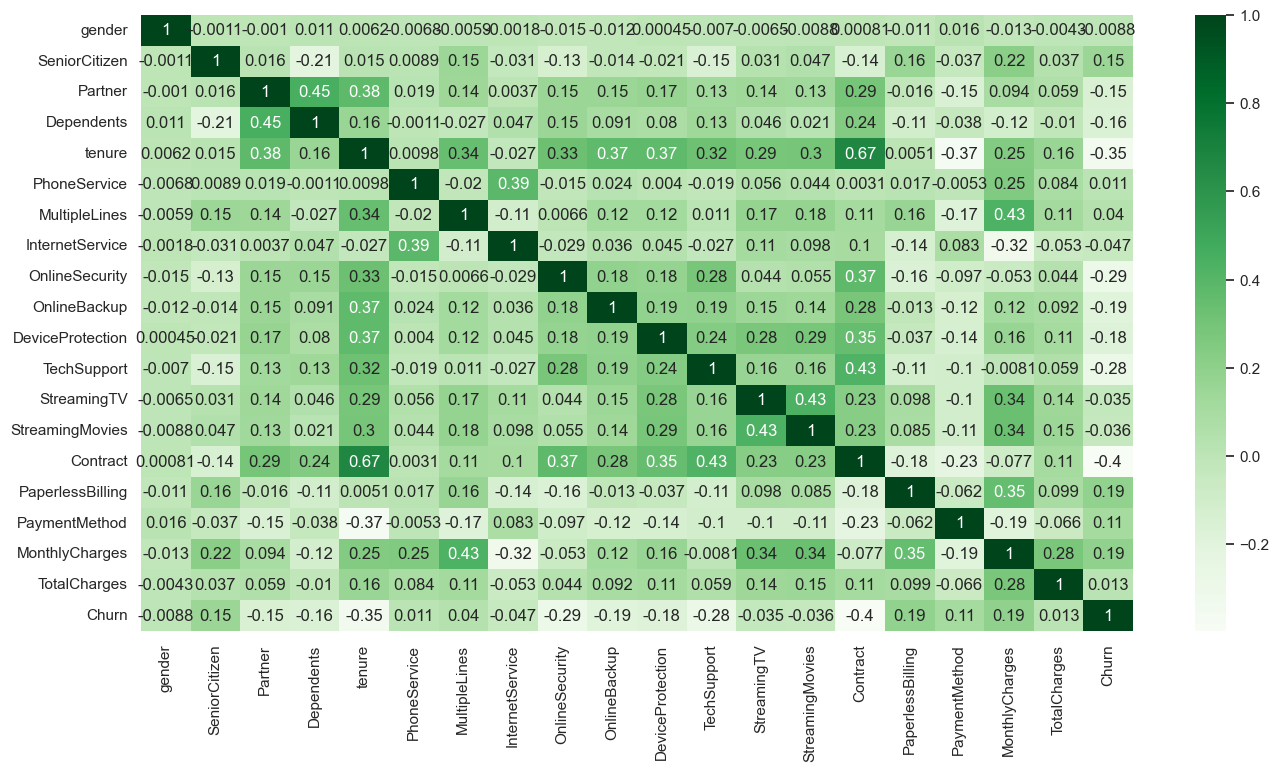

In [18]:
get_corr_plot(df)

In [19]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['MultipleLines'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['DeviceProtection'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['TechSupport'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['StreamingTV'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['StreamingMovies'] = df['OnlineSecurity'].replace('No internet service', 'No')

In [20]:
df['TotalCharges'] = df['TotalCharges'].replace("'", "").replace('"','').replace(" ", "").replace('', np.nan).astype('float')

### Chech and Fix Data Types

In [22]:
# df['TotalCharges-isdigit'] = df['TotalCharges'].apply(lambda x: str(int(float(x))).isdigit())

In [23]:
# df['TotalCharges-isdigit'].sum()

In [24]:
# df[df['TotalCharges-isdigit'] == False].shape[0]

In [25]:
df.isna().sum()/df.shape[0]

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001567
Churn               0.000000
dtype: float64

In [26]:
# df.dropna(subset=['TotalCharges'], inplace=True)

# Analysis

## Visualize

In [42]:
from lifelines import KaplanMeierFitter
from sklearn.ensemble import RandomForestClassifier

def visualize(df):
    df_input = df.copy()
    df_input.dropna(subset=['TotalCharges'], inplace=True)
    # Convert 'Churn' column to numeric dtype
    df_input['Churn'] = df_input['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)
    
    # Churn rate over time
    df_input['tenure_months'] = df_input['tenure']
    churn_rate_over_time = df_input.groupby('tenure_months')['Churn'].mean()
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=churn_rate_over_time.index, y=churn_rate_over_time.values)
    plt.title('Churn Rate Over Tenure Months')
    plt.xlabel('Tenure Months')
    plt.ylabel('Churn Rate')
    plt.show()
    
    # Customer segmentation
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Contract', hue='Churn', data=df_input)
    plt.title('Churned Customers by Contract Type')
    plt.xlabel('Contract Type')
    plt.ylabel('Count')
    plt.show()
    
    # Survival analysis
    kmf = KaplanMeierFitter()
    kmf.fit(durations=df_input['tenure_months'], event_observed=df_input['Churn'])
    
    plt.figure(figsize=(10, 6))
    kmf.plot()
    plt.title('Survival Curve for Churned Customers')
    plt.xlabel('Tenure Months')
    plt.ylabel('Survival Probability')
    plt.show()
    
    # Feature importance
    X = df_input[['tenure', 'MonthlyCharges', 'TotalCharges']]
    y = df_input['Churn']
    
    rf = RandomForestClassifier()
    rf.fit(X, y)
    
    feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance.values, y=feature_importance.index)
    plt.title('Feature Importance for Churn Prediction')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

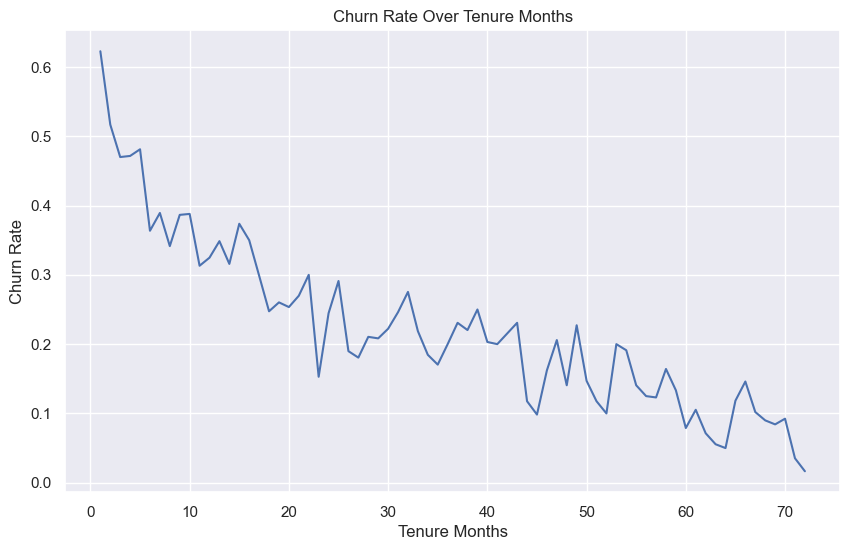

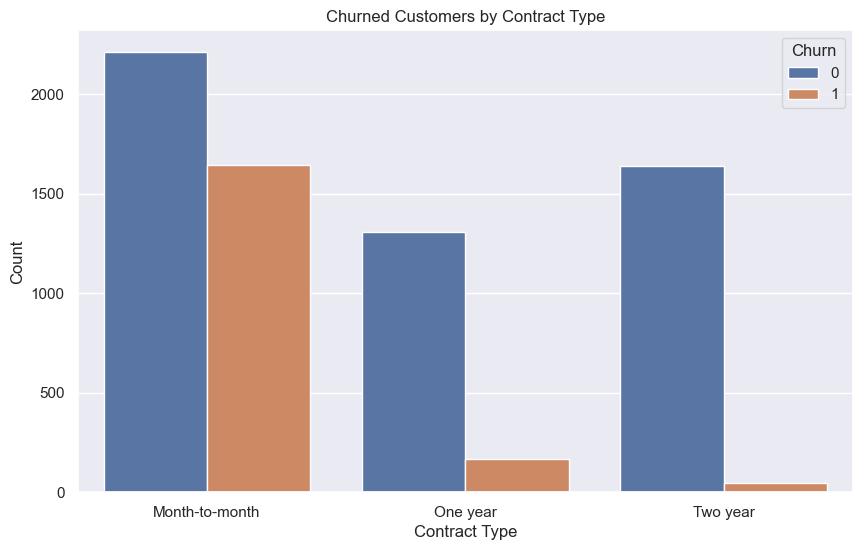

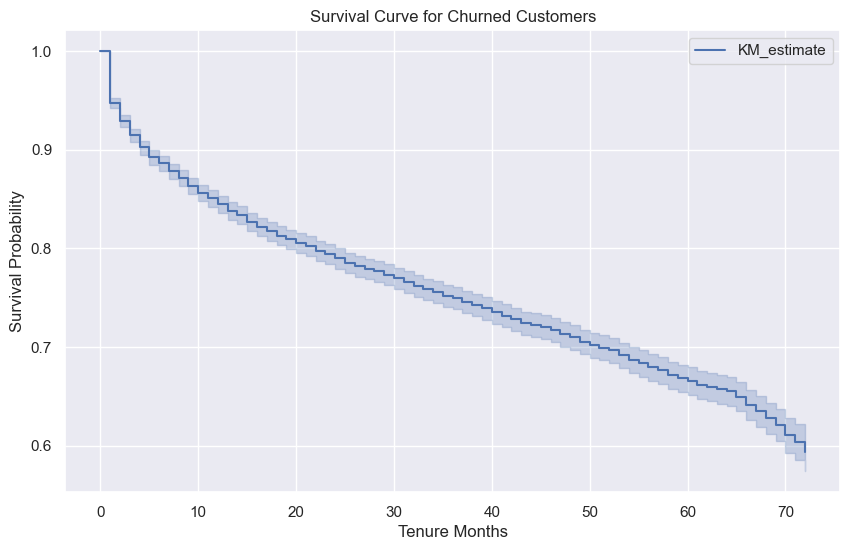

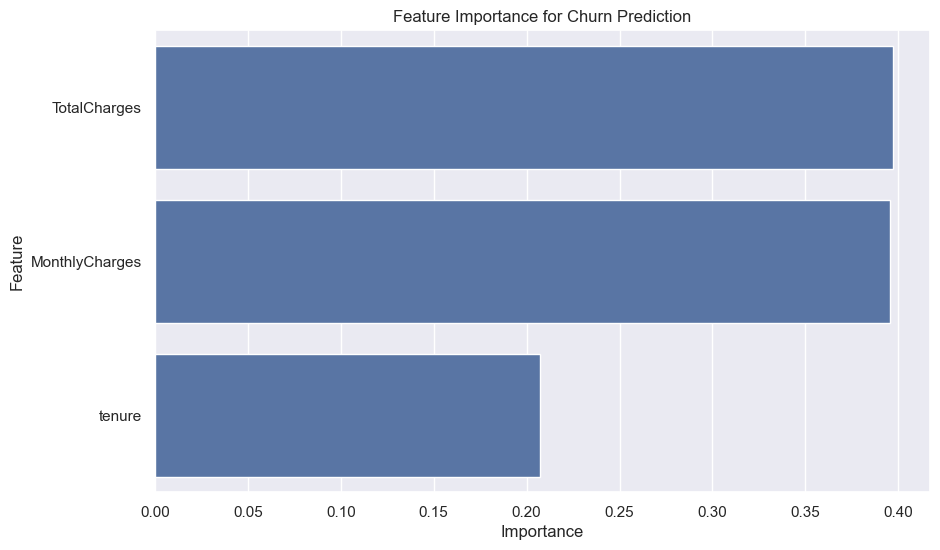

In [43]:
visualize(df)

# Predict Churn with Machine Learning Model (Classification)

## Label Encoding

### Feature Engineering


### Feature Selection

## Model

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [31]:
# pip install imblearn

In [85]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
}

In [33]:
## balance

In [76]:
from sklearn.metrics import roc_curve, f1_score, precision_score, accuracy_score, roc_auc_score, recall_score, classification_report, confusion_matrix

## split data

In [56]:
def split_data(df, target_col):
    df_input = df.copy()
    df_input.dropna(subset=['TotalCharges'], inplace=True)
    # encode
    for col in df_input.select_dtypes(exclude='number').columns:
        encoder = LabelEncoder()
        df_input[col] = encoder.fit_transform(df_input[col])
    
    # Split
    X = df_input.drop(target_col, axis=1)
    y = df_input[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    return X_train, X_test, y_train, y_test

## scale data

In [59]:
def scale_data(df, target_col):
    
    X_train, X_test, y_train, y_test = split_data(df, target_col)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

## roc_auc curve

In [94]:
# def roc_curve_plot(df, target_col, models):
#     X_train, X_test, y_train, y_test = split_data(df, target_col)
#     X_train_scaled, X_test_scaled = scale_data(df, target_col)

#     colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # List of colors for different models

#     for i, (model_name, model) in enumerate(models.items()):
#         model.fit(X_train_scaled, y_train)
#         y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]

#         fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
#         plt.plot([0, 1], [0, 1], 'k--')
#         plt.plot(fpr, tpr, label=model_name, color=colors[i])
    
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.legend(loc='lower right')
#     plt.show()


In [103]:
# roc_curve_plot(df, 'Churn', models)

## box plot

In [100]:
# def get_modeleval_plot(df, target_col, models):
    
#     X_train_scaled, X_test_scaled = scale_data(df, target_col)
    
#     results = []
#     for model in models.values():
#         kf = KFold(n_splits=6, shuffle=True, random_state=42)
#         cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
#         results.append(cv_results)
    
#     # Define colors for the boxplot
#     box_colors = ['darkblue', 'lightgreen', 'lightpink']
    
#     plt.boxplot(results, labels=models.keys(), patch_artist=True, boxprops=dict(facecolor='lightblue'), whiskerprops=dict(color='black'))
#     plt.xlabel('Models')
#     plt.ylabel('Cross-validation Accuracy')
#     plt.title('Boxplot of Cross-validation Accuracy for Different Models')
#     plt.xticks(rotation=45)
#     plt.show()
        

In [102]:
# get_modeleval_plot(df, 'Churn', models)

## no pipeline

In [67]:
def model_eval(df, target_col, model):

    # Split data
    X_train, X_test, y_train, y_test = split_data(df, target_col)
    
    # Scale data
    X_train_scaled, X_test_scaled = scale_data(df, target_col)

    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    
    # Build Model 
    model.fit(X_train_scaled, y_train)

    # Prediction
    y_pred = model.predict(X_test_scaled)

    # Metrics
    model_metric_dict = {
        "model_name": model,
        "f1_score": f1_score(y_test, y_pred),
        "precision_score": precision_score(y_test, y_pred),
        "recall_score": recall_score(y_test, y_pred),
        "accuracy_score": accuracy_score(y_test, y_pred),
        "roc_auc_score": roc_auc_score(y_test, y_pred),
        "cross_val_result": cv_results.mean()
    }

    return model_metric_dict
    


## pipeline

In [69]:
def model_eval_pipeline(df, target_col, model):
    df_input = df.copy()
    df_input['Churn'] = df_input['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)
    
    # Split
    X = df_input.drop(target_col, axis=1)
    y = df_input[target_col]
    
    df_input = df_input.drop(target_col, axis=1)

    # numerical

    numeric_features = df_input.select_dtypes(include="number").columns
    
    numeric_transformer = Pipeline(
        steps=[('imputer', SimpleImputer(strategy='mean')),
               ('scaler', StandardScaler())]
    )

    # categorical
    categorical_features = df_input.select_dtypes(exclude="number").columns
    categorical_transformer = OneHotEncoder(handle_unknown="ignore")


    preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                 ('cat', categorical_transformer, categorical_features)
                 ]
    )

    clf = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ("classifier",  model)
          ]
    )

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Cross val score
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results = cross_val_score(clf, X_train, y_train, cv=kf)

    # Build Model 
    clf.fit(X_train, y_train)

    # Prediction
    y_pred = clf.predict(X_test)


    # Metrics
    model_metric_dict = {
        "model_name": model,
        "f1_score": f1_score(y_test, y_pred),
        "precision_score": precision_score(y_test, y_pred),
        "recall_score": recall_score(y_test, y_pred),
        "accuracy_score": accuracy_score(y_test, y_pred),
        "roc_auc_score": roc_auc_score(y_test, y_pred),
        "cross_val_result": cv_results.mean()
    }

    return model_metric_dict

### no pipeline

In [68]:
pd.DataFrame([model_eval(df,"Churn", model) for model_name, model in models.items()]).sort_values("f1_score", ascending=False) #.style.background_gradient(cmap="coolwarm")

,model_name,f1_score,precision_score,recall_score,accuracy_score,roc_auc_score,cross_val_result
0,LogisticRegression(),0.575301,0.651877,0.514825,0.798859,0.707946,0.800463
2,KNeighborsClassifier(),0.500750,0.564189,0.450135,0.762482,0.662507,0.764803
1,DecisionTreeClassifier(),0.483660,0.469543,0.498652,0.718260,0.647968,0.726105


### pipline

In [70]:
pd.DataFrame([model_eval_pipeline(df,"Churn", model) for model_name, model in models.items()]).sort_values("f1_score", ascending=False)

,model_name,f1_score,precision_score,recall_score,accuracy_score,roc_auc_score,cross_val_result
0,LogisticRegression(),0.582583,0.659864,0.521505,0.802135,0.712350,0.802350
1,DecisionTreeClassifier(),0.525358,0.508816,0.543011,0.740214,0.677120,0.728276
2,KNeighborsClassifier(),0.495468,0.565517,0.440860,0.762278,0.659443,0.766204


## box plot and roc curve plot

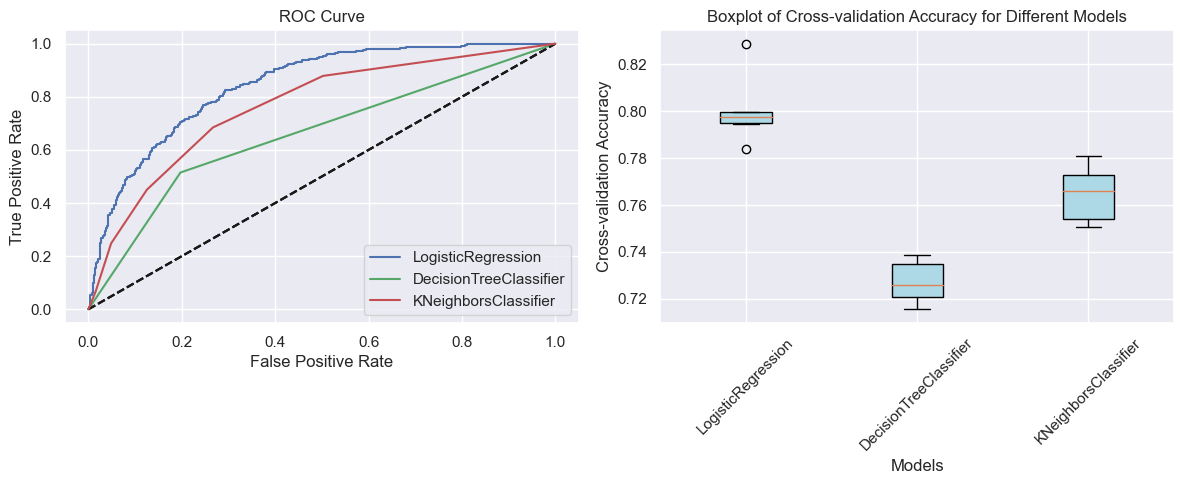

In [99]:
def box_roc_curve_plot(df, target_col, models):
    X_train, X_test, y_train, y_test = split_data(df, target_col)
    X_train_scaled, X_test_scaled = scale_data(df, target_col)

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # List of colors for different models

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Create subplots

    for i, (model_name, model) in enumerate(models.items()):
        model.fit(X_train_scaled, y_train)
        y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
        ax1.plot([0, 1], [0, 1], 'k--')
        ax1.plot(fpr, tpr, label=model_name, color=colors[i])
    
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curve')
    ax1.legend(loc='lower right')

    results = []
    for model in models.values():
        kf = KFold(n_splits=6, shuffle=True, random_state=42)
        cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
        results.append(cv_results)
    
    # Define colors for the boxplot
    box_colors = ['darkblue', 'lightgreen', 'lightpink']
    
    ax2.boxplot(results, labels=models.keys(), patch_artist=True, boxprops=dict(facecolor='lightblue'), whiskerprops=dict(color='black'))
    ax2.set_xlabel('Models')
    ax2.set_ylabel('Cross-validation Accuracy')
    ax2.set_title('Boxplot of Cross-validation Accuracy for Different Models')
    ax2.set_xticklabels(models.keys(), rotation=45)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Assuming you have defined df, target_col, and models dictionary elsewhere

box_roc_curve_plot(df, 'Churn', models)
